In [ ]:
def get_gradient_at_b(x,y,b,m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff
  return b_gradient

def get_gradient_at_m(x,y,b,m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff
  return m_gradient


def step_gradient(x,y,b_current,m_current):
  b_gradient = get_gradient_at_b(x,y,b_current,m_current)
  m_gradient = get_gradient_at_m(x,y,b_current,m_current)
  b = b_current - (0.01 * b_gradient)
  m = m_current - (0.01 * m_gradient)
  return (b,m)

months = [1,2,3,4,5,6,7,8,9,10,11,12]
revenue = [52,74,79,95,115,110,129,126,147,146,156,184]

b = 0 # current intercept guess
m = 0 # current slope guess
b,m = step_gradient(months,revenue,b,m) # calls function to update b and m
print(b,m)


2.355 17.78333333333333


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

model = LinearRegression()

df_x_train = pd.read_excel('PS1_data.xlsx', sheet_name = 'X_train')
df_y_train = pd.read_excel('PS1_data.xlsx', sheet_name = 'Y_train')
x_train = df_x_train.values.flatten()
y_train = df_y_train.values.flatten()

model.fit(df_x_train,df_y_train) # returns which model it is (linear regression)
predictions = model.predict(df_x_train)
# print(predictions)
model.score(df_x_train,df_y_train) # returns the coefficient of determination R squared

0.7020315537841397

In [ ]:
# 2 - Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

In [ ]:
# 3 - Dataset
# Load the data from the Excel file
df_x_train = pd.read_excel('PS1_data.xlsx', sheet_name = 'X_train')
df_y_train = pd.read_excel('PS1_data.xlsx', sheet_name = 'Y_train')

# Convert the dataframes back to numpy arrays
x_train = df_x_train.values.flatten()
y_train = df_y_train.values.flatten()

# Print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

# Print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

# Check dimenstions of the variables
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]
The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


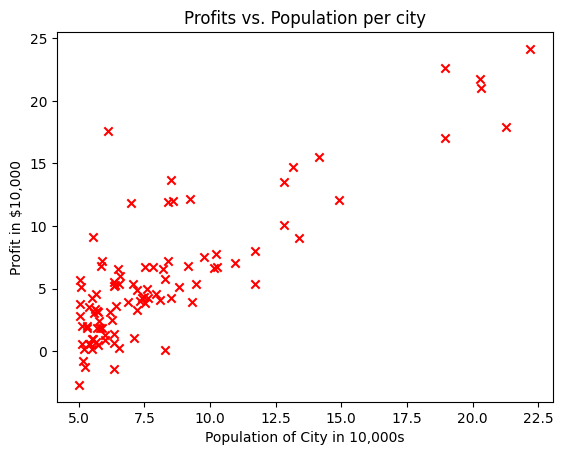

In [ ]:
# 3.1 - Data Visualization
#  Create a scatter plot of the data. Set the title, y-axis label, and x-axis label.
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [ ]:
# 4 - Exercise 1. Compute Cost

def compute_cost(x, y, w, b):
    m = x.shape[0] # number of training examples
    total_cost = 0

    for i in range(m):
      f_wb = w * x[i] + b # given a w and b, this calculates the expected output
      total_cost += (f_wb - y[i]) ** 2 # this calculates the square of the difference between the expected and actual output

    total_cost /= (2 * m) # dividing by m ensures that the cost function is comparable across different dataset sizes

    return total_cost

initial_w = 2
initial_b = 1
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost at initial w: {cost:.3f}')


Cost at initial w: 75.203


In [ ]:
# 5 - Exercise 2. Gradient Descent

def compute_gradient(x, y, w, b):

  m = x.shape[0] # number of training examples
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b # given a w and b, this calculates the expected output
    dj_dw += (f_wb - y[i]) * x[i] # calculates derivative of J with respect to w
    dj_db += (f_wb - y[i]) # calculates derivative of J with respect to b

  dj_dw /= m # divides by the number of training examples
  dj_db /= m # divides by the number of training examples

  return dj_dw, dj_db # returns the total gradient update from all the examples given a certain w and b

test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)


Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [ ]:
# 6 - Learning Parameters using Batch Gradient Descent

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

  m = len(x) # number of training examples
  J_history = [] # an array to store the cost J at each iteration
  w_history = [] # an array to store the w's at each iteration
  w = copy.deepcopy(w_in) # avoid modifying global w within function
  b = b_in

  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(x, y, w, b) # calculates the gradient given a certain w and b using the previous gradient function
    w -= alpha * dj_dw # using gradient descent, we move up in iterations to find the optimal w
    b -= alpha * dj_db # using gradient descent, we move up in iterations to find the optimal b

    if i < 100000: # prevent resource exhaustion
      cost = cost_function(x, y, w, b)
      J_history.append(cost) # save the cost J at each iteration

    if i % math.ceil(num_iters / 10) == 0:
      w_history.append(w)
      print(f"Iteration {i:4}: Cost {J_history[-1]:8.2f}") # prints cost in 10 intervals

  return w, b, J_history, w_history #return w and J,w history for graphing

initial_w = 0
initial_b = 0
iterations = 1500
alpha = 0.01

w, b, J_history, w_history = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)


print(f'w, b found by gradient descent:',w,b) # this is our optimal w and b found by gradient descent

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w, b found by gradient descent: 1.166362350335582 -3.63029143940436


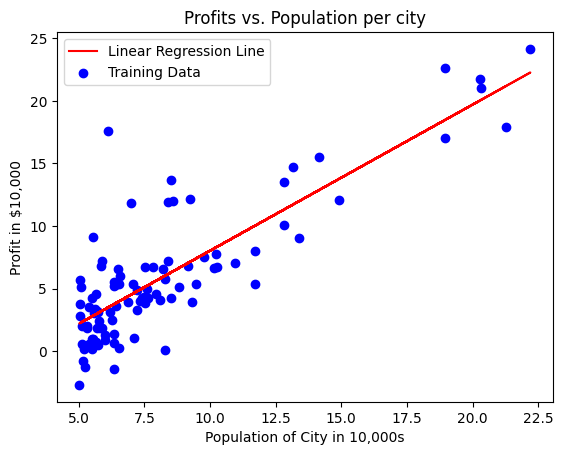

In [ ]:
# 7 - Exercise 3

w = 1.16636235 # value of w from previous gradient descent
b = -3.63029143940436 # value of b from previous gradient descent

m = x_train.shape[0] # number of training examples
predicted = np.zeros(m)

for i in range(m):
  predicted[i] = w * x_train[i] + b # loops through all the training examples and find the prediction for each one


# 7.1 - Plotting the Predicted Values to see the Linear Fit

# Plotting the Linear Fit
plt.plot(x_train, predicted, color='red', label='Linear Regression Line')

# Creating a Scatter Plot of the Data
plt.scatter(x_train, y_train, color='blue', label='Training Data')

# Setting the title and labels
plt.title("Profits vs. Population per city")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

plt.legend()
plt.show()

In [ ]:
# 8 - Exercise 4

w = 1.16636235 # value of w from previous gradient descent
b = -3.63029143940436 # value of b from previous gradient descent

population1 = np.array([3.5]) # inputs population 1 in terms of 10,000s
population2 = np.array([7.0]) # inputs population 2 in terms of 10,000s

def predict_profit(pop, w, b):
  return w * pop + b

predict1 = predict_profit(population1, w, b) # makes predictions of profits for population 1
predict2 = predict_profit(population2, w, b) # makes predictions of profits for population 2

print('For population = 35,000, we predict a profit of $%.2f' %(predict1.item()*10000))
print('For population = 70,000, we predict a profit of $%.2f' %(predict2.item()*10000))



For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
